In [99]:
import numpy as np
from numpy import array, exp, sqrt
import pandas as pd
from copy import deepcopy
from mkt_data import mkt_data as md
from scipy.stats import norm, normaltest, probplot


import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

np.set_printoptions(precision=5)

% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
csv = 'csv/eurusd.csv'

In [178]:
index = pd.read_csv(csv, parse_dates=['Date'])
index['dlogS'] = index.Close.diff()/index.Close
index.dropna(inplace=True)

In [179]:
index.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,dlogS
1,2019-05-21,1.116944,1.118318,1.114243,1.116857,1.116857,0.0,0.000291
4,2019-05-24,1.118381,1.121202,1.117805,1.118456,1.118456,0.0,0.002600


The null hypothesis can be rejected p = 3.9917663959986433e-17


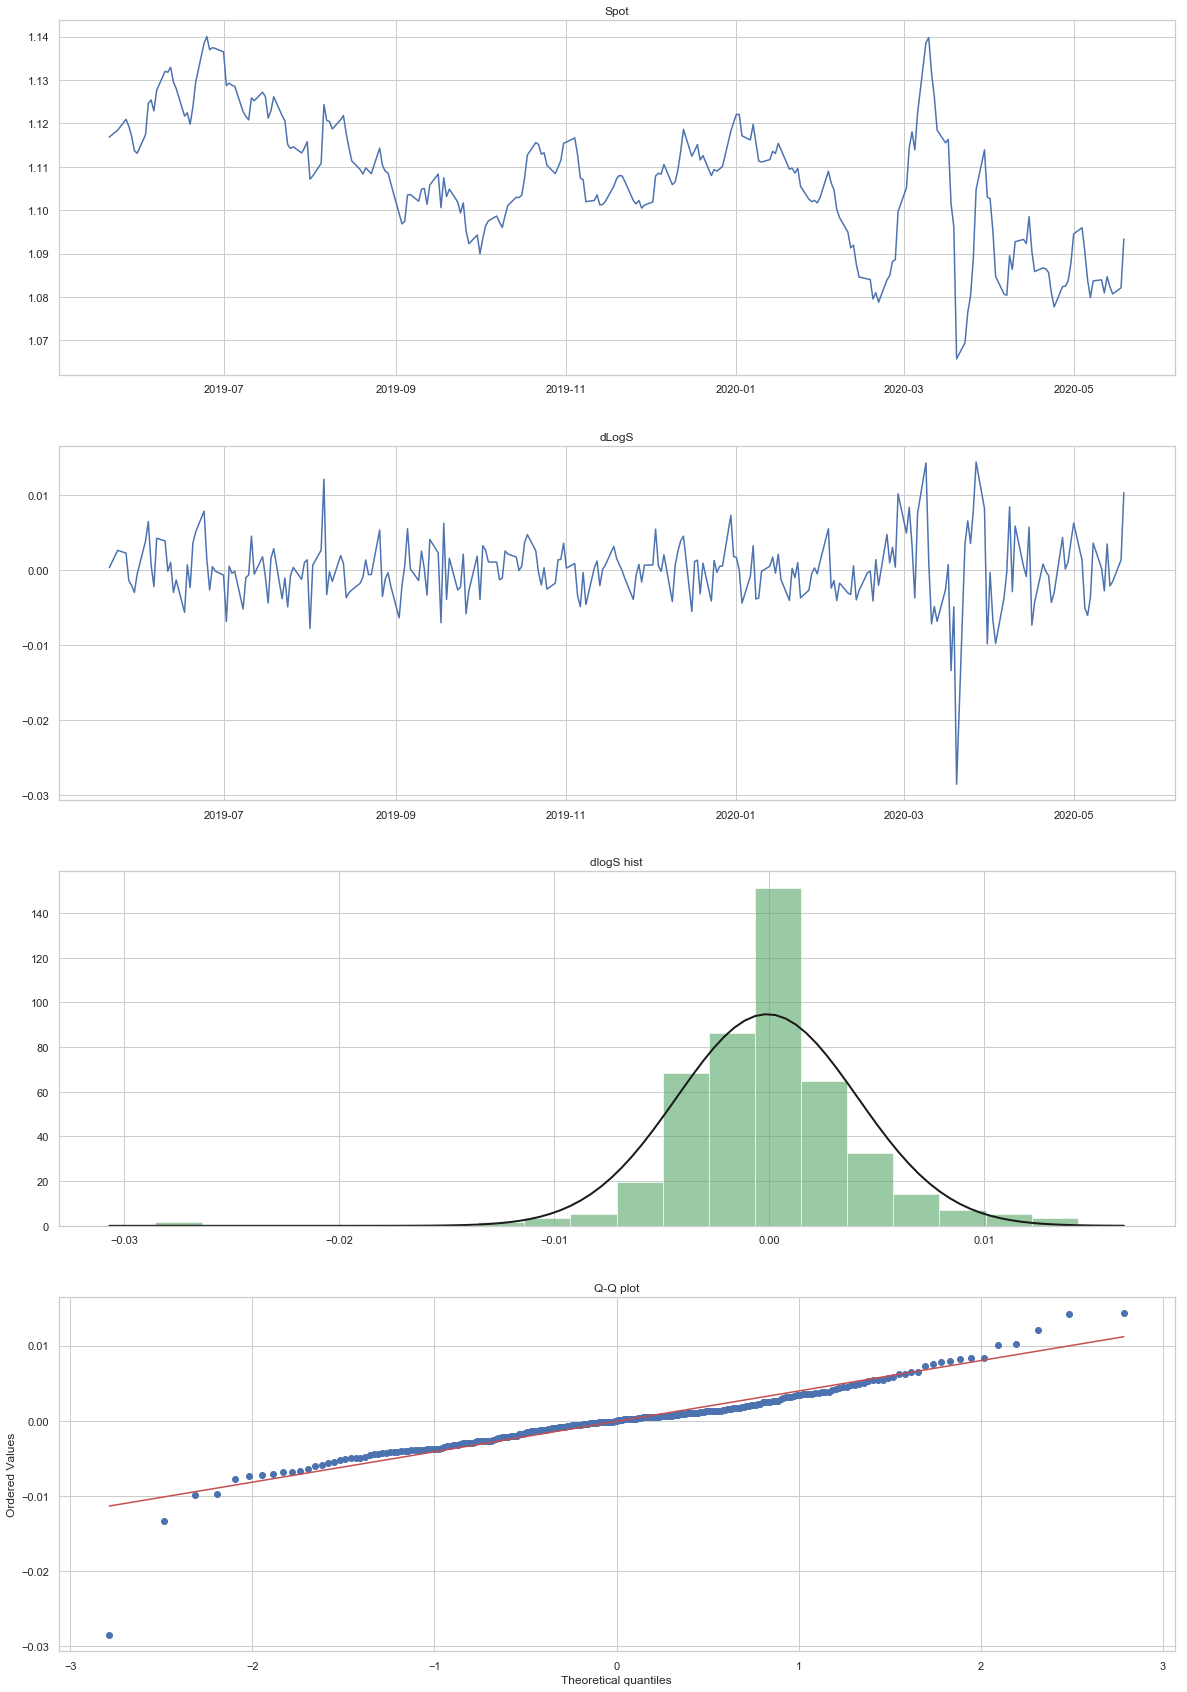

In [175]:
fig, axs = plt.subplots(4, figsize=(20,30))

axs[0].plot(index.Date, index.Close);
axs[0].set_title('Spot')
axs[1].plot(index.Date, index.dlogS);
axs[1].set_title('dLogS')



axs[2].hist(index.dlogS, bins=20, density=True, alpha=0.6, color='g');
mu, std = norm.fit(index.dlogS)
xmin, xmax = axs[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[2].plot(x, p, 'k', linewidth=2);
axs[2].set_title('dlogS hist')

probplot(index.dlogS, dist="norm", plot=axs[3]);
axs[3].set_title('Q-Q plot')

k2, p = normaltest(index.dlogS)
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print(f"The null hypothesis can be rejected p = {p}")
else:
    print(f"The null hypothesis cannot be rejected p = {p}")

The null hypothesis cannot be rejected p = 0.009132295821827615


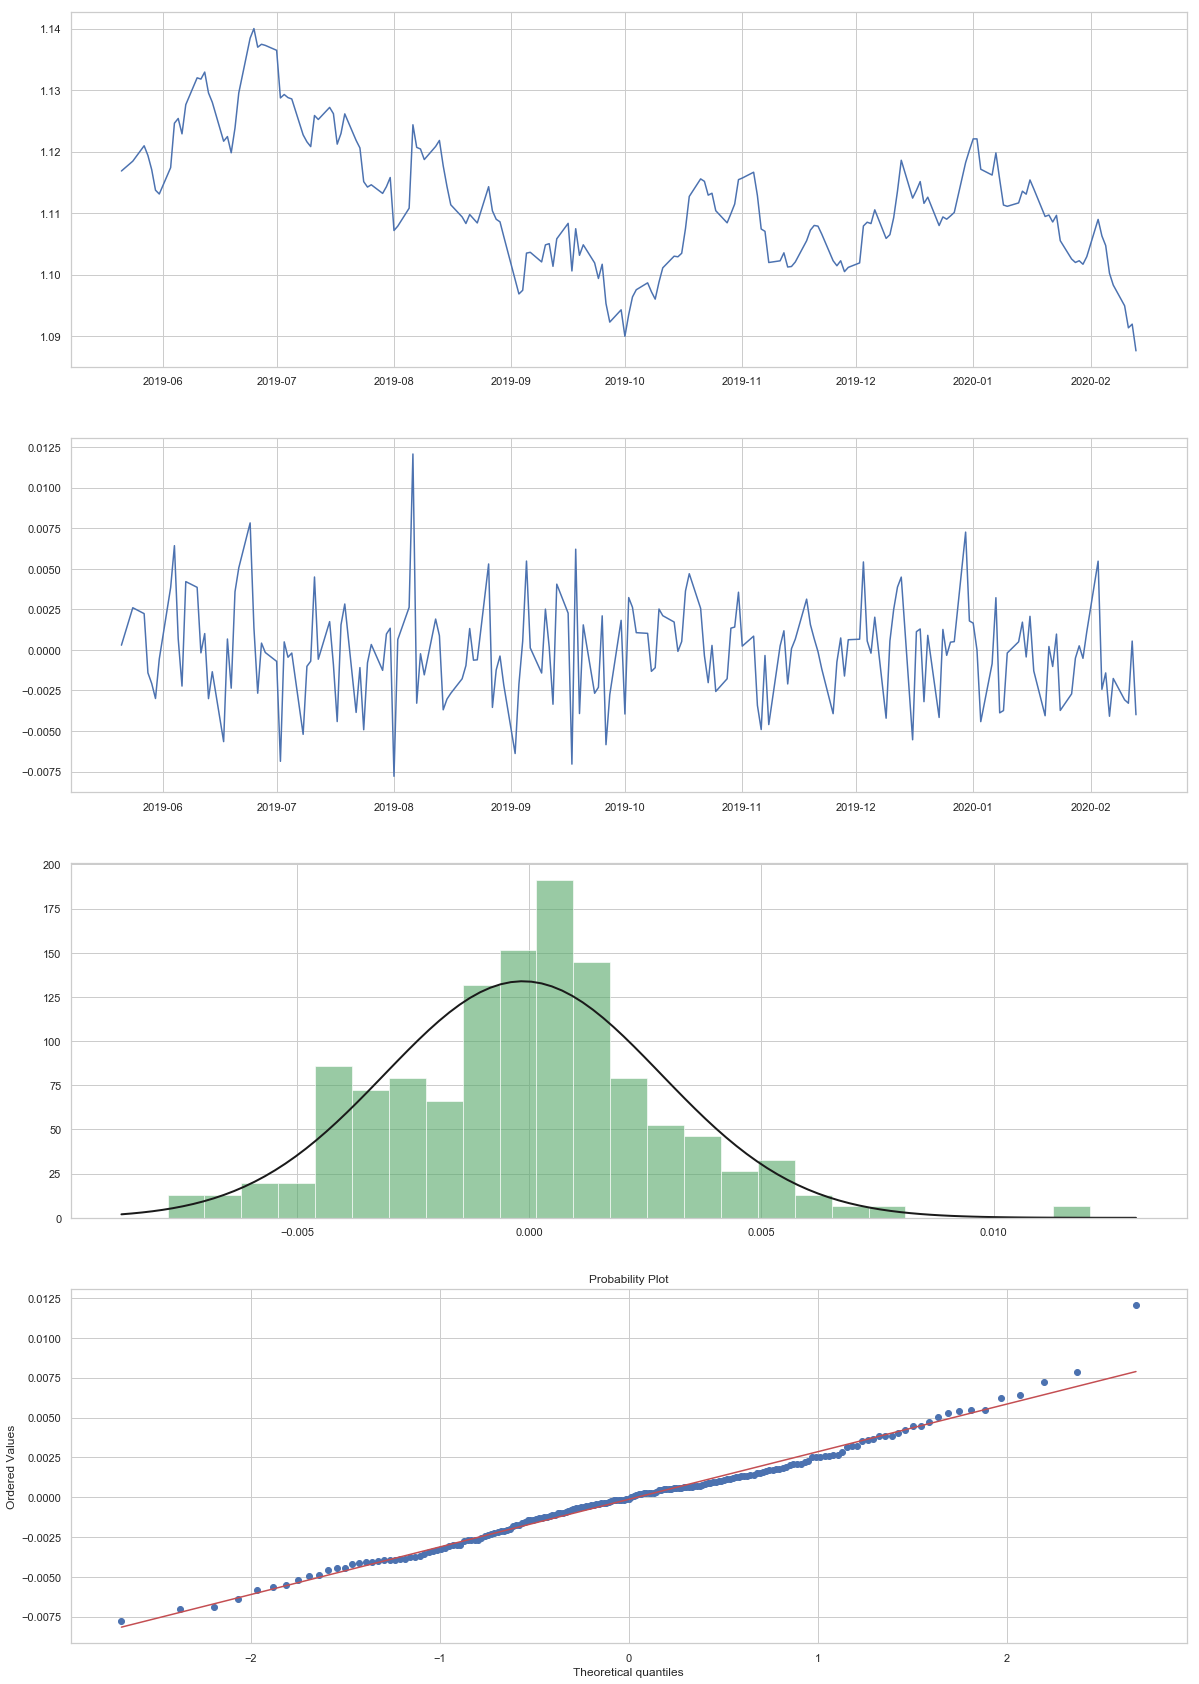

In [176]:
indexold = index[index.Date < np.datetime64('2020-02-14')]

fig, axs = plt.subplots(4, figsize=(20, 30))

axs[0].plot(indexold.Date, indexold.Close);
axs[1].plot(indexold.Date, indexold.dlogS);


axs[2].hist(indexold.dlogS, bins=25, density=True, alpha=0.6, color='g');
mu, std = norm.fit(indexold.dlogS)
xmin, xmax = axs[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[2].plot(x, p, 'k', linewidth=2);

probplot(indexold.dlogS, dist="norm", plot=axs[3]);

k2, p = normaltest(indexold.dlogS)
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print(f"The null hypothesis can be rejected p = {p}")
else:
    print(f"The null hypothesis cannot be rejected p = {p}")